# IMPORTING NECESSARY LIBRARIES

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# DATA UNDERSTANDING

In [108]:
df = pd.read_csv('deliveries.csv')

In [109]:
df

match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

        over  ball       batter         bowler  non_striker  batsman_runs  \
0          0     1   SC Ganguly        P Kumar  BB McCullum             0   
1          0     2  BB McCullum        P Kumar   SC Ganguly             0   
2          0     3  BB McCullum        P Kumar   SC Ganguly             0   
3          0     4  BB McCullum        P Kumar   SC Ganguly             0   
4          0     5  BB McCullum        P Kumar   SC Ganguly             0   
...      ...   ...          ...            ...          ...           ...   
260915     9     5      SS Iyer     AK Markram      VR Iyer             1   
260916     9     6      VR Iyer     AK Markram      SS Iyer             1   
260917    10     1      VR Iyer  Shahbaz Ahmed      SS Iyer             1   
260918    10     2      SS Iyer  Shahbaz Ahmed      VR Iyer             1   
260919    10     3      VR Iyer  Shahbaz Ahmed      SS Iyer             1   

        extra_runs  total_runs extras_type  is_wicket player_dismissed  \
0                1           1     legbyes          0              NaN   
1                0           0         NaN          0              NaN   
2                1           1       wides          0              NaN   
3                0           0         NaN          0              NaN   
4                0           0         NaN          0              NaN   
...            ...         ...         ...        ...              ...   
260915           0           1         NaN          0              NaN   
260916           0           1         NaN          0              NaN   
260917           0           1         NaN          0              NaN   
260918           0           1         NaN          0              NaN   
260919           0           1         NaN          0              NaN   

       dismissal_kind fielder  
0                 NaN     NaN  
1                 NaN     NaN  
2                 NaN     NaN  
3                 NaN     NaN  
4                 NaN     NaN  
...               ...     ...  
260915            NaN     NaN  
260916            NaN     NaN  
260917            NaN     NaN  
260918            NaN     NaN  
260919            NaN     NaN  

[260920 rows x 17 columns]

In [110]:
df.shape

(260920, 17)

In [111]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [112]:
df.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [113]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [114]:
df.describe()

match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         1.000000       0.000000       1.000000       0.000000  
75%         1.000000       0.000000       1.000000       0.000000  
max         6.000000       7.000000       7.000000       1.000000

In [115]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
260915    False
260916    False
260917    False
260918    False
260919    False
Length: 260920, dtype: bool

In [116]:
df.nunique()

match_id            1095
inning                 6
batting_team          19
bowling_team          19
over                  20
ball                  11
batter               673
bowler               530
non_striker          663
batsman_runs           7
extra_runs             7
total_runs             8
extras_type            5
is_wicket              2
player_dismissed     629
dismissal_kind        10
fielder              607
dtype: int64

In [117]:
df.select_dtypes(include=[float, int])

match_id  inning  over  ball  batsman_runs  extra_runs  total_runs  \
0         335982       1     0     1             0           1           1   
1         335982       1     0     2             0           0           0   
2         335982       1     0     3             0           1           1   
3         335982       1     0     4             0           0           0   
4         335982       1     0     5             0           0           0   
...          ...     ...   ...   ...           ...         ...         ...   
260915   1426312       2     9     5             1           0           1   
260916   1426312       2     9     6             1           0           1   
260917   1426312       2    10     1             1           0           1   
260918   1426312       2    10     2             1           0           1   
260919   1426312       2    10     3             1           0           1   

        is_wicket  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
260915          0  
260916          0  
260917          0  
260918          0  
260919          0  

[260920 rows x 8 columns]

In [118]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(df[col].value_counts())

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64
bowling_team
Mumbai Indians                 31505
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Royal Challengers Bangalore    28358
Rajasthan Royals               26432
Kings XI Punjab                22483
Sunrisers Hyderabad    

# DATA VISUALIZATION

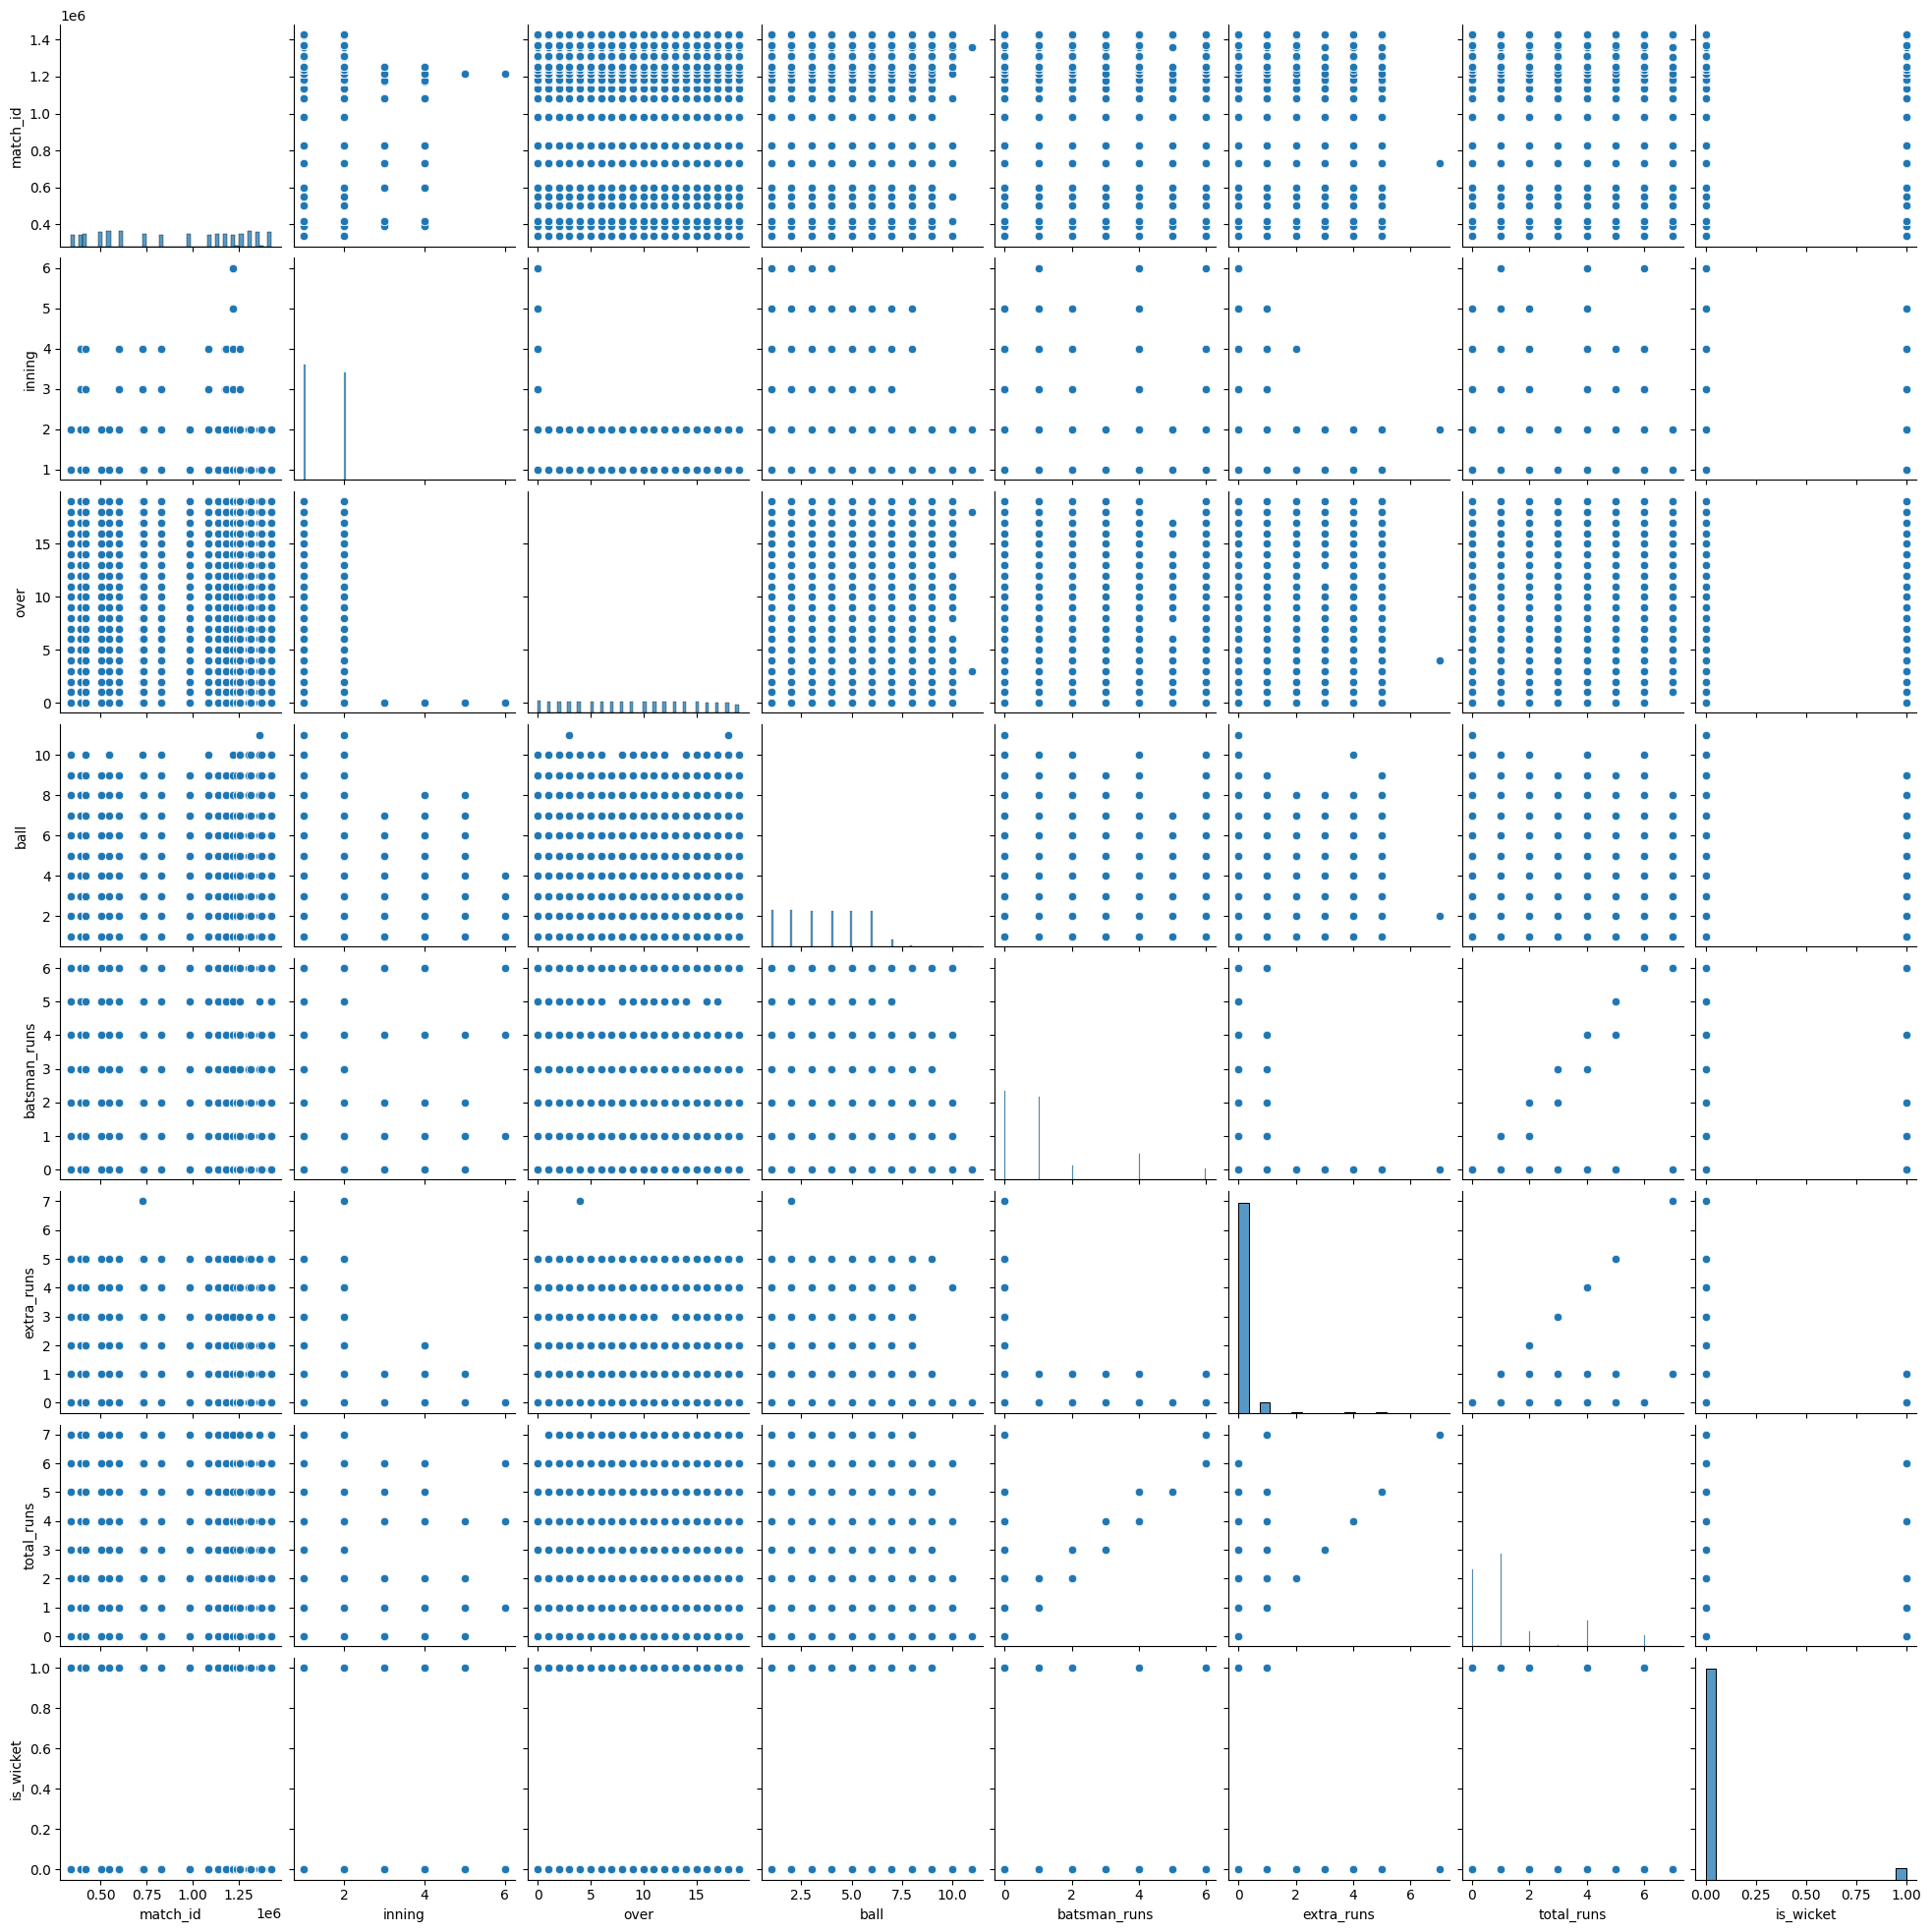

In [119]:
sns.pairplot(df)

In [120]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

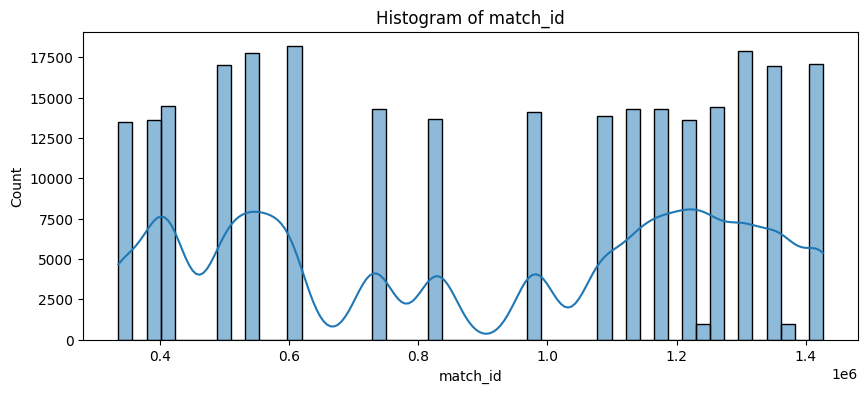

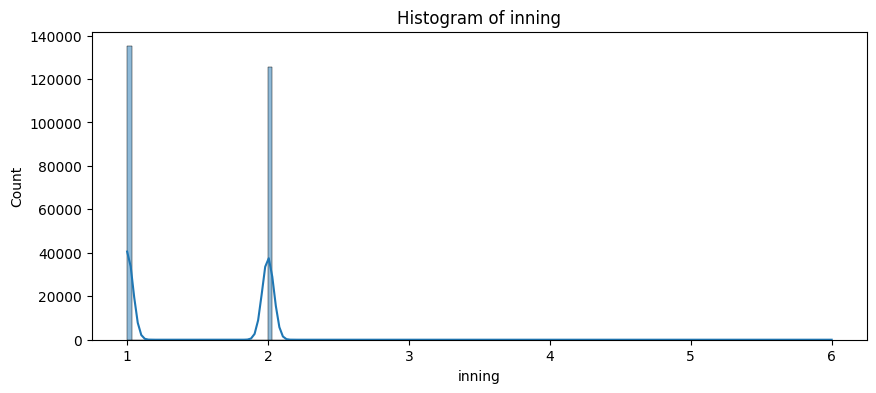

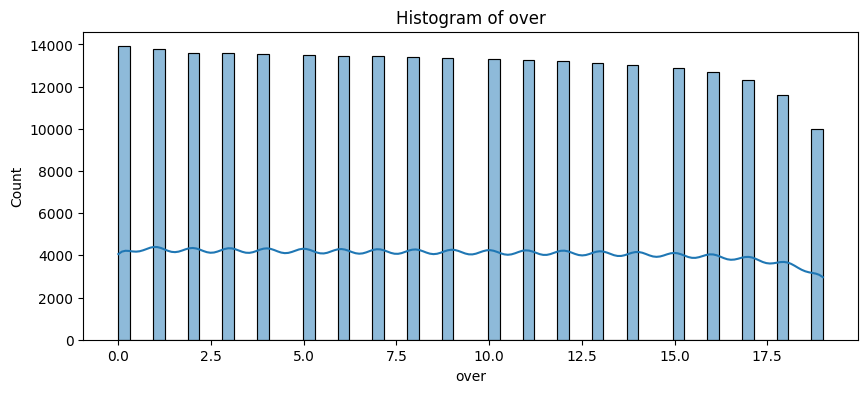

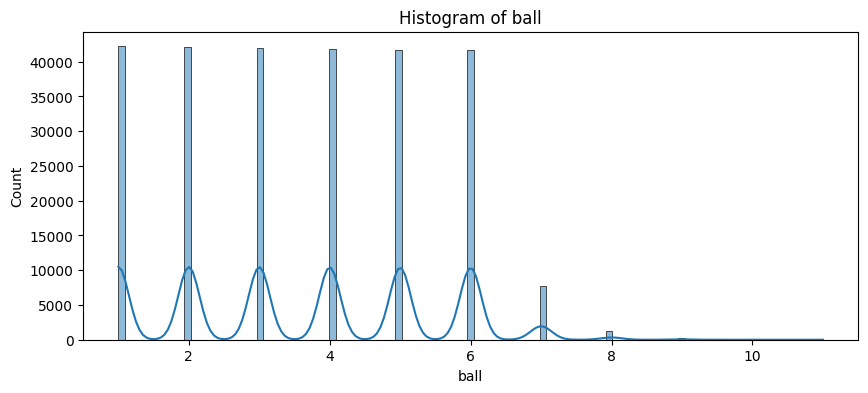

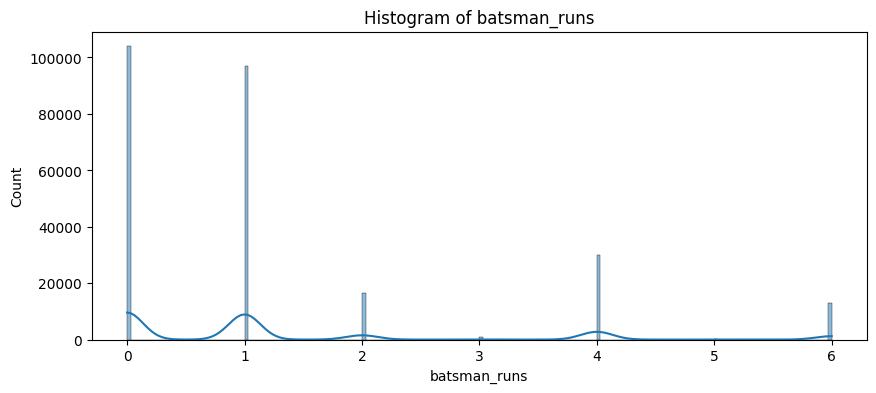

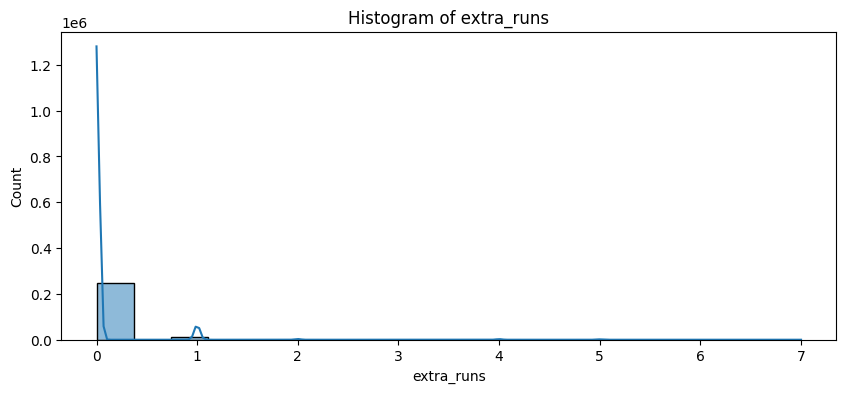

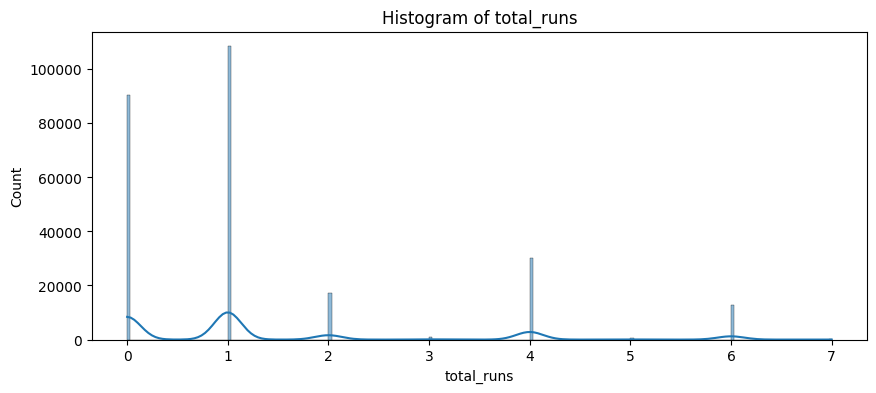

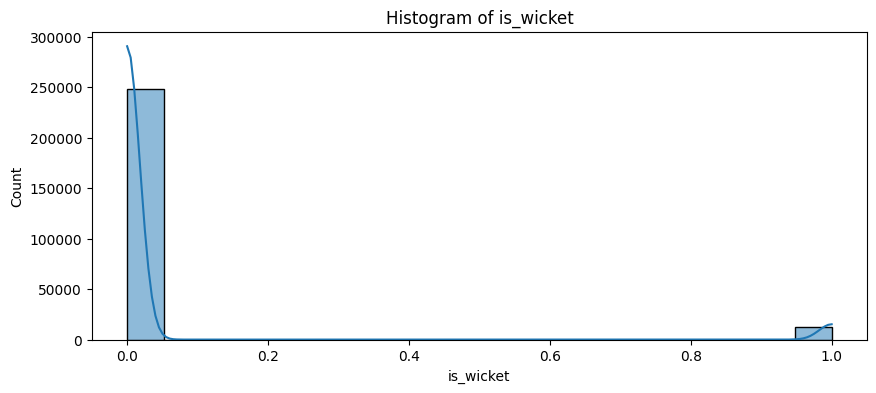

In [121]:
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

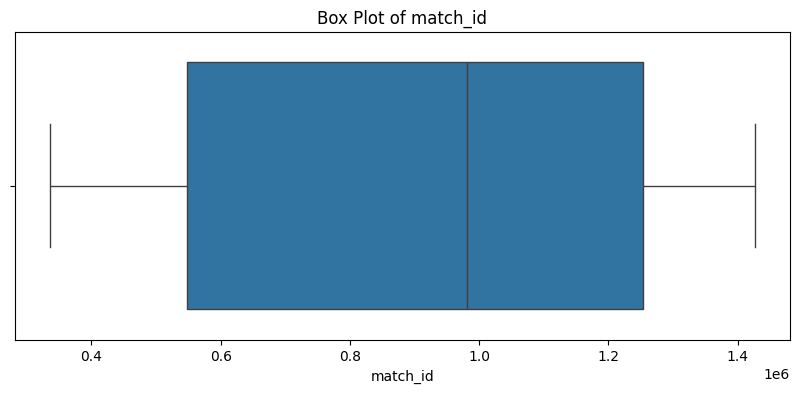

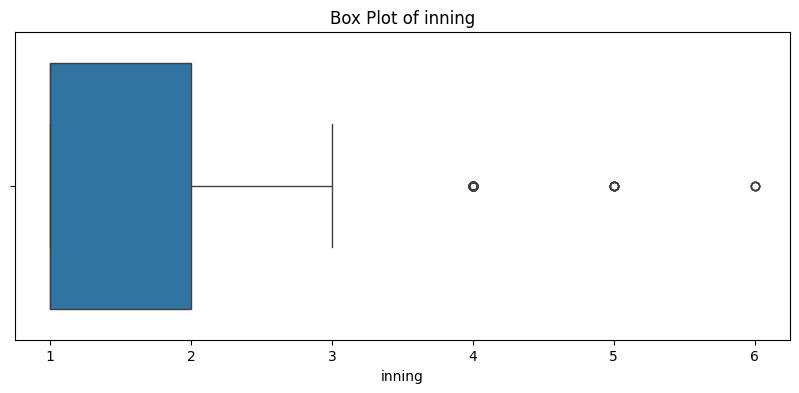

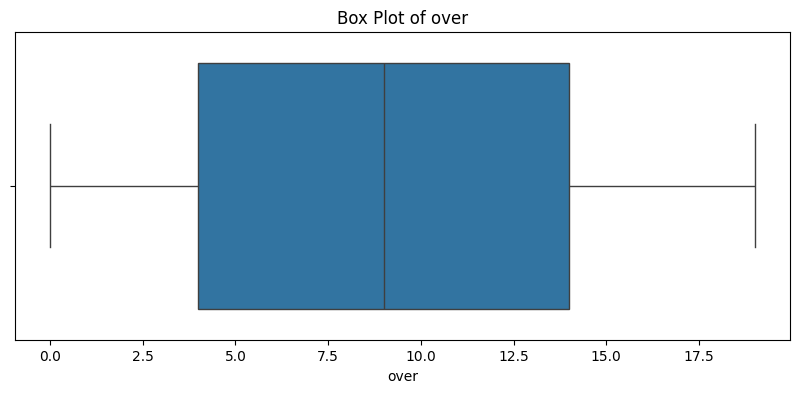

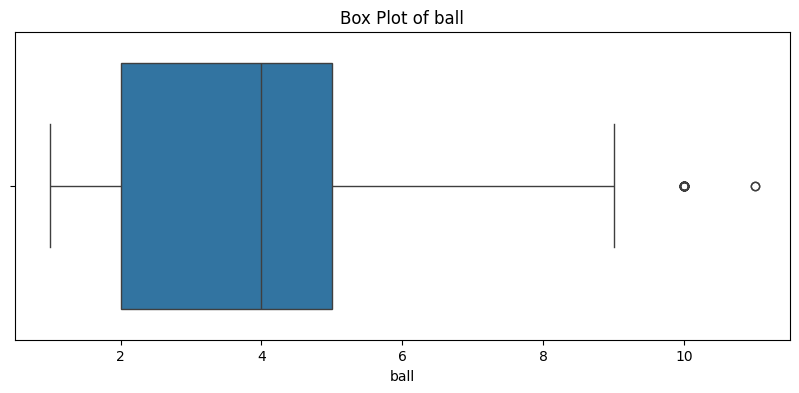

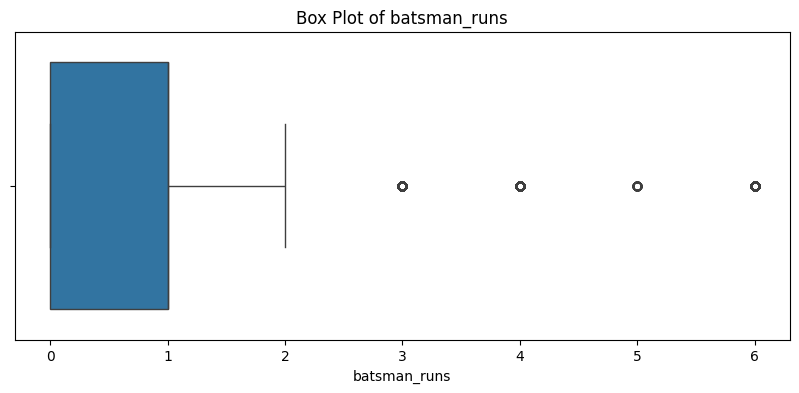

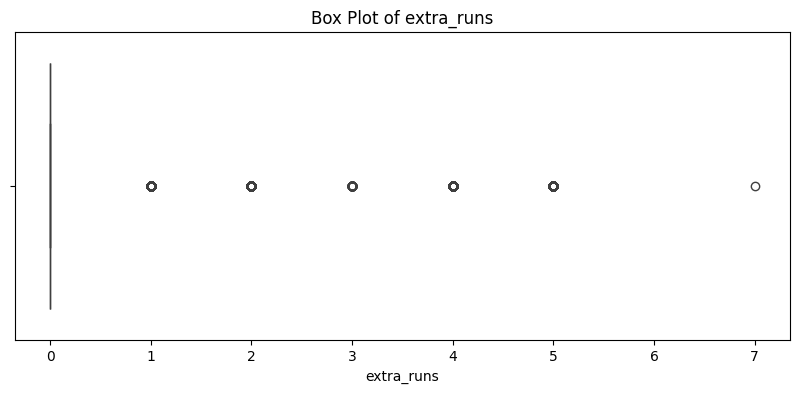

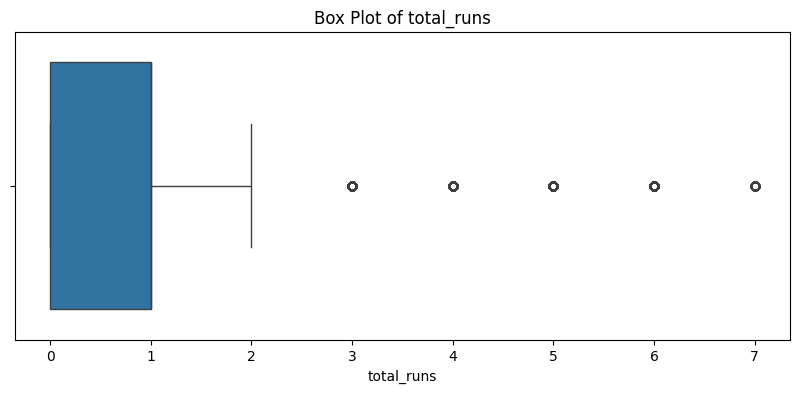

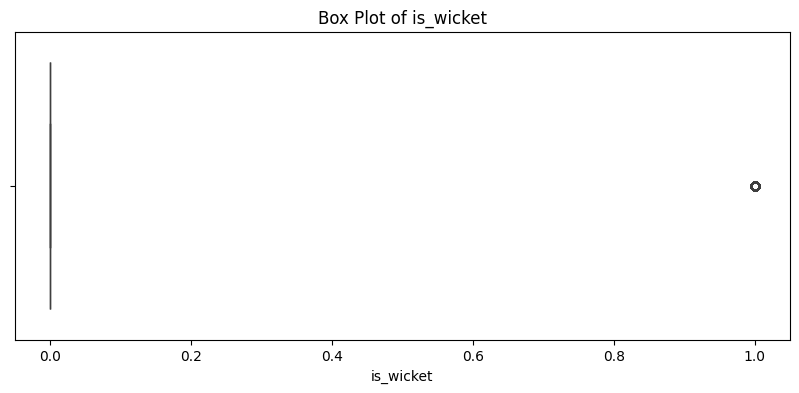

In [122]:
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

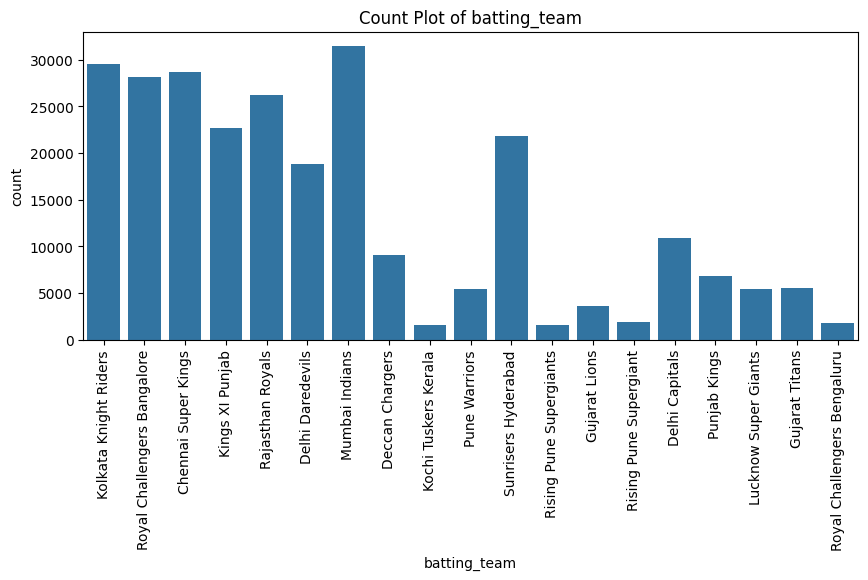

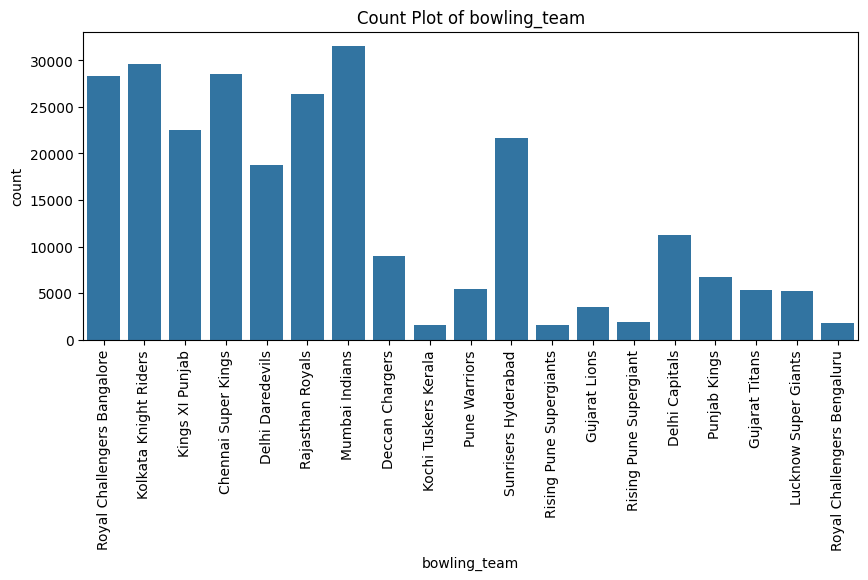

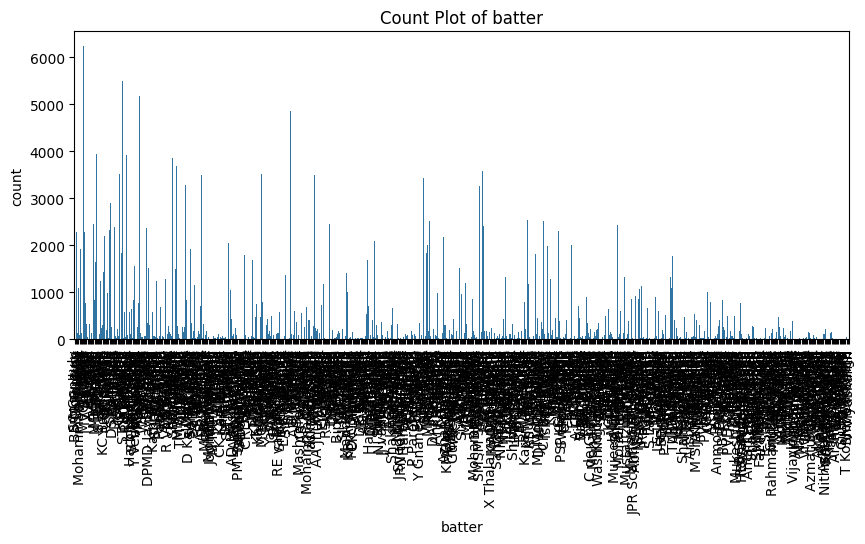

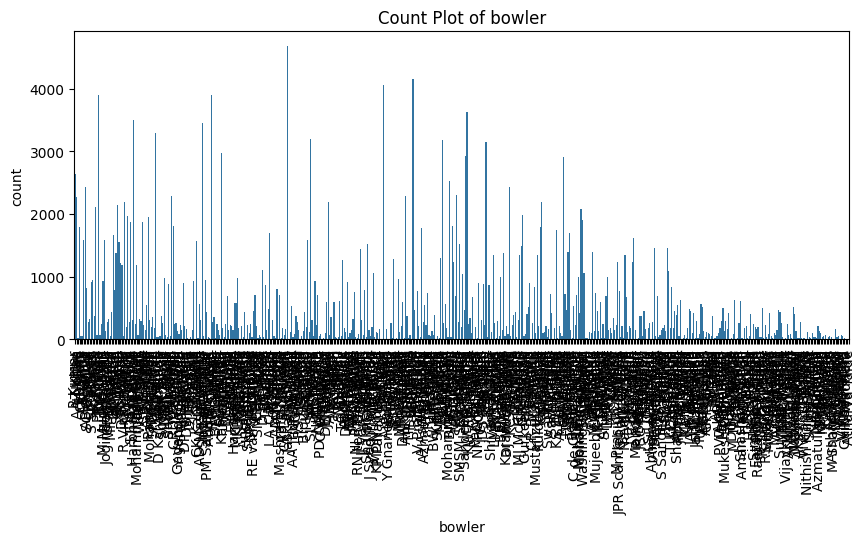

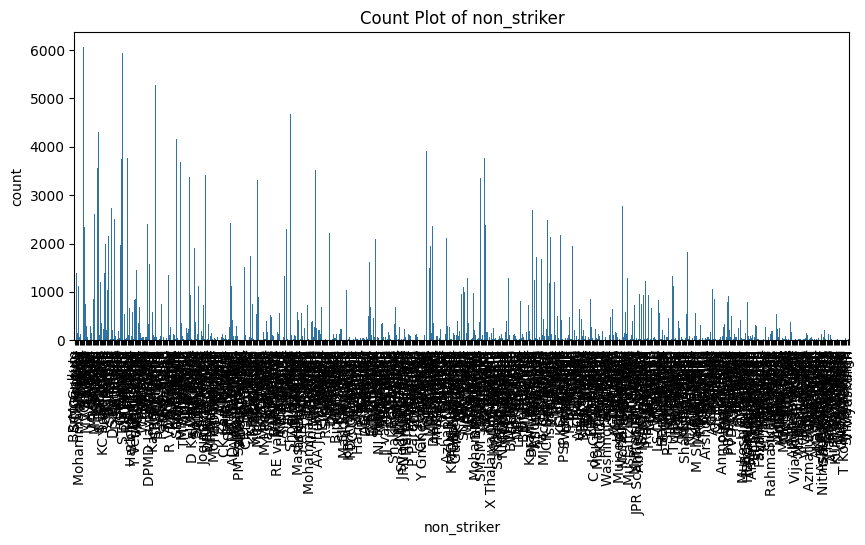

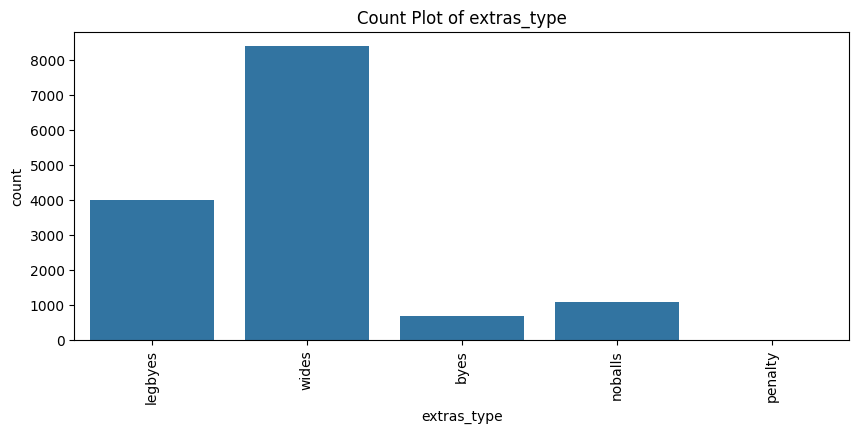

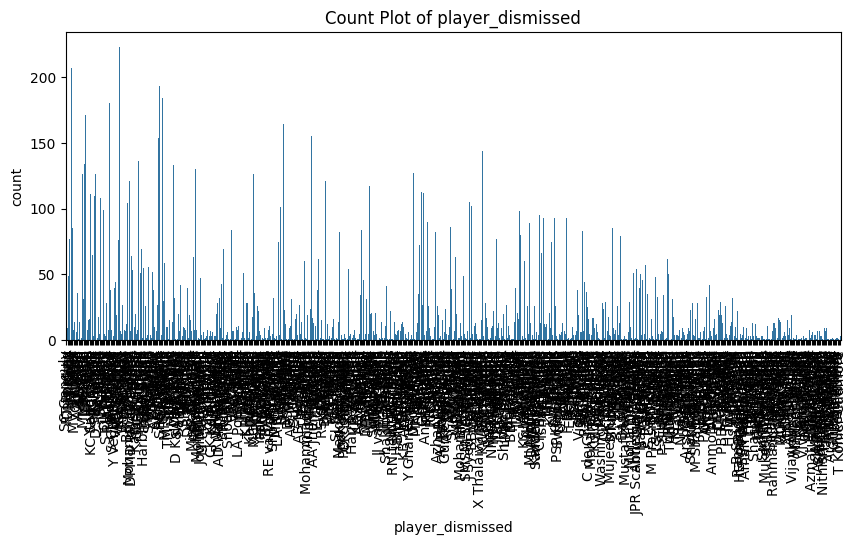

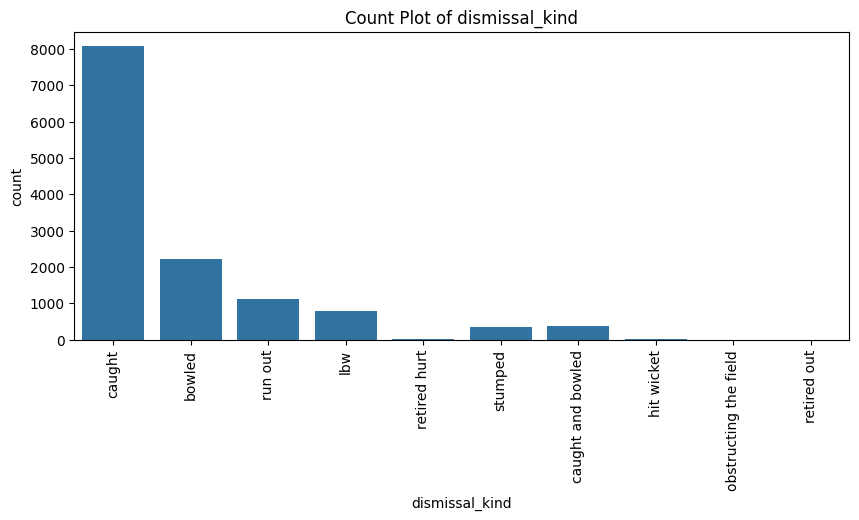

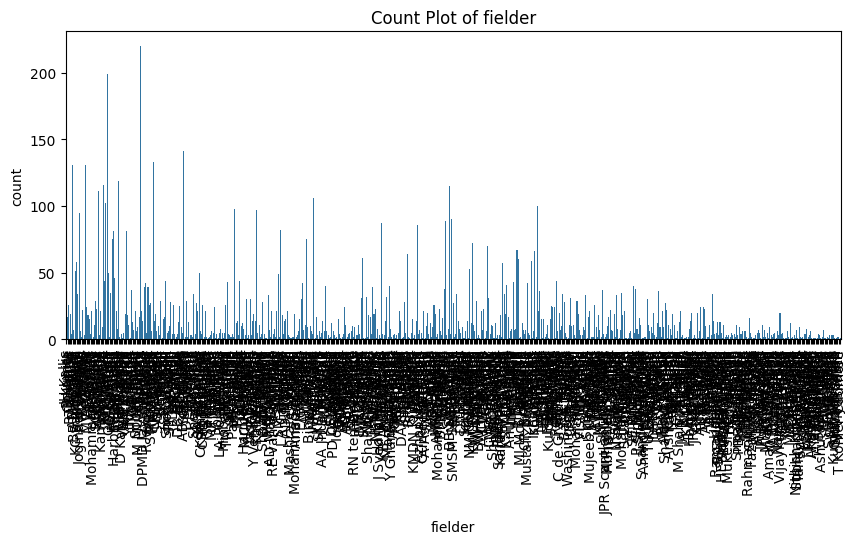

In [123]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

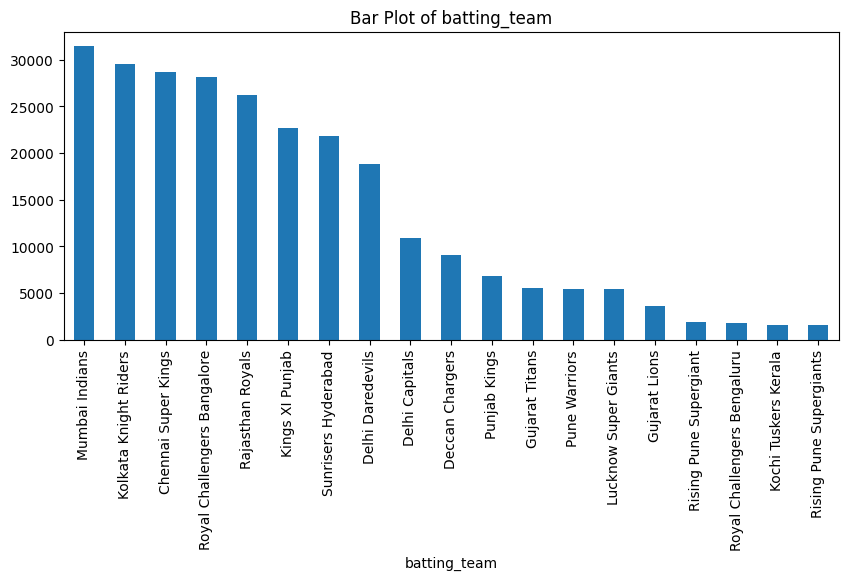

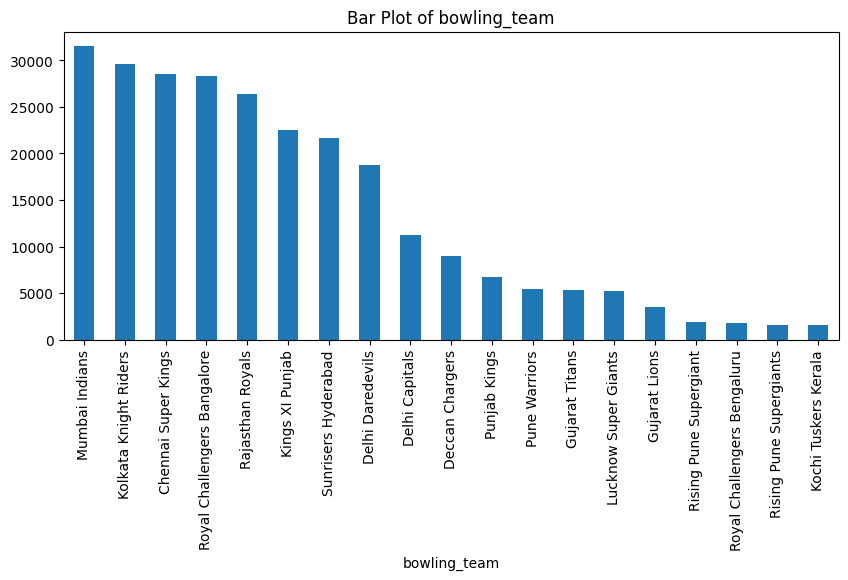

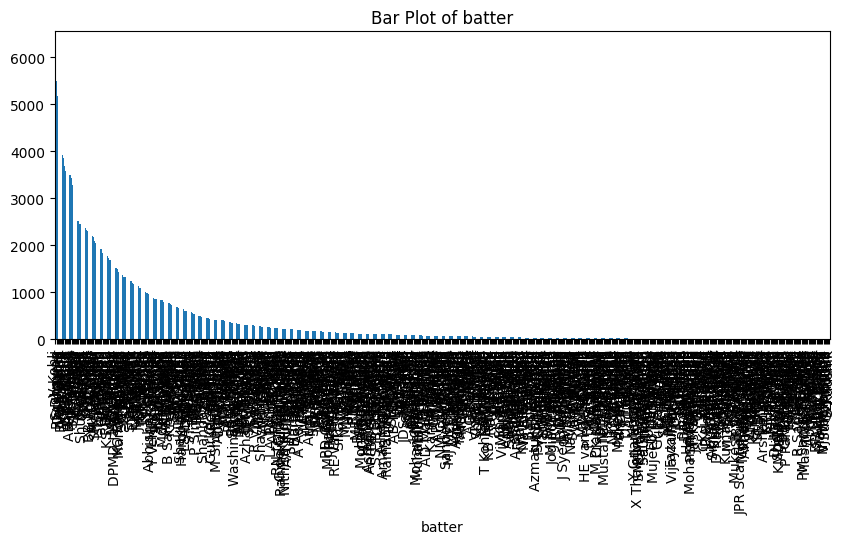

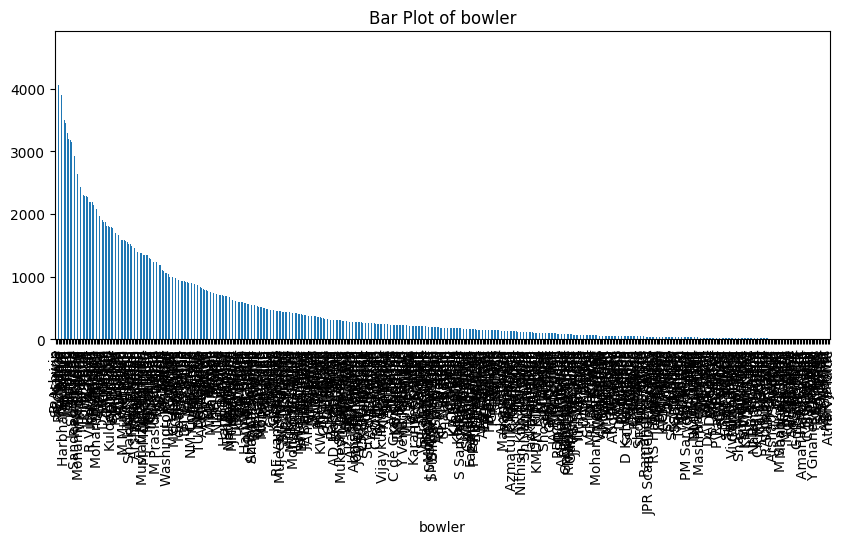

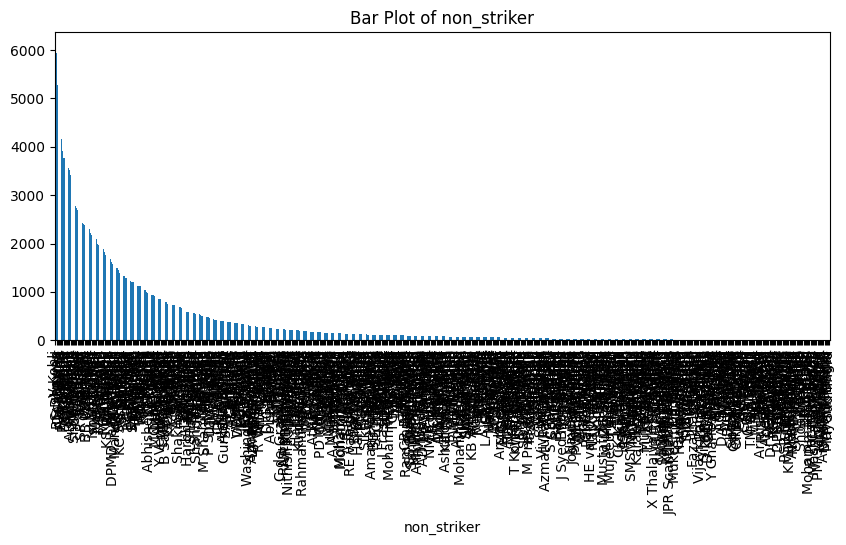

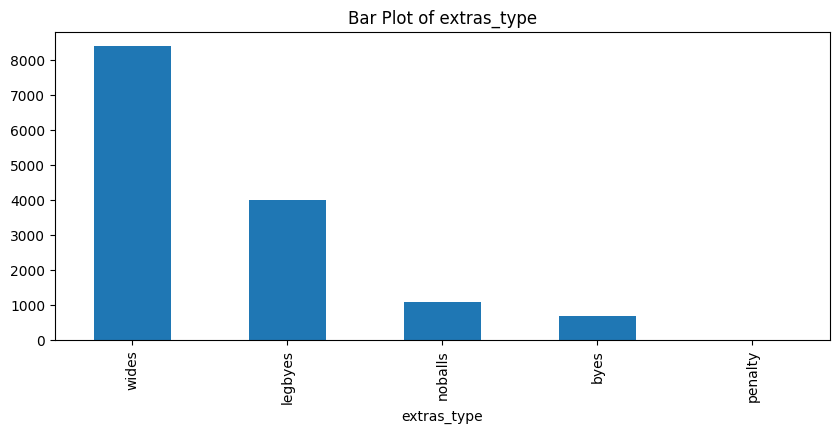

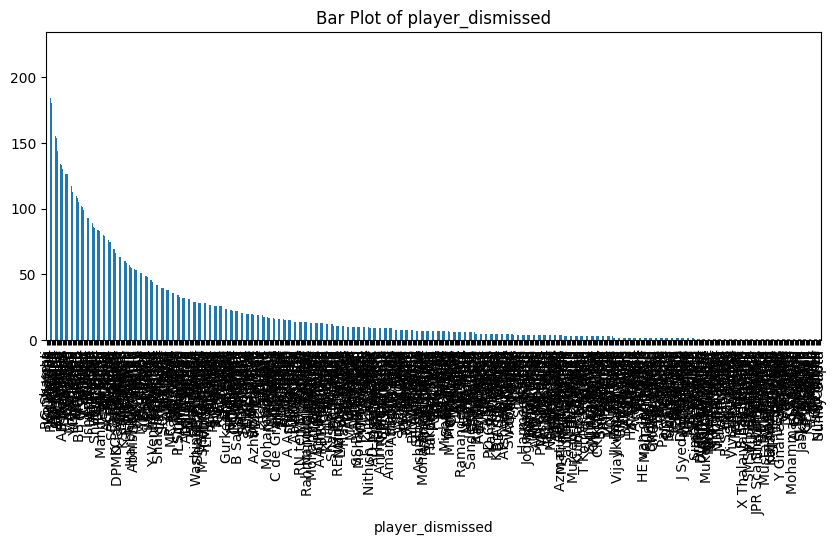

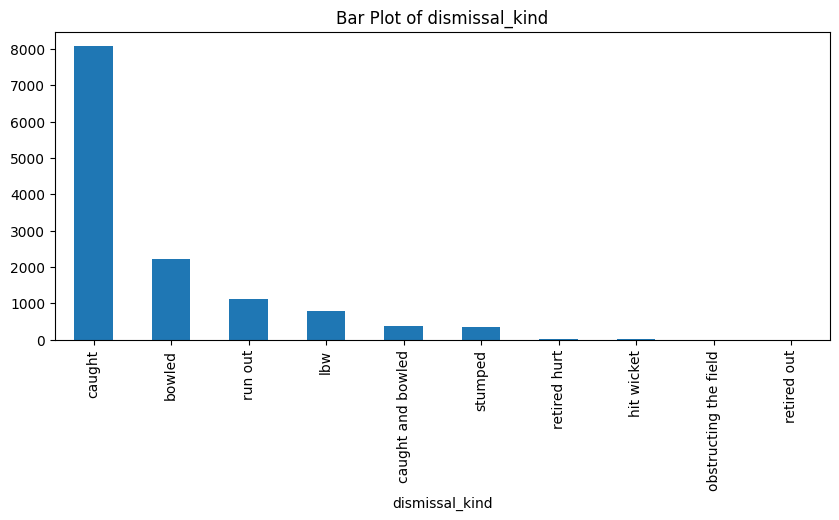

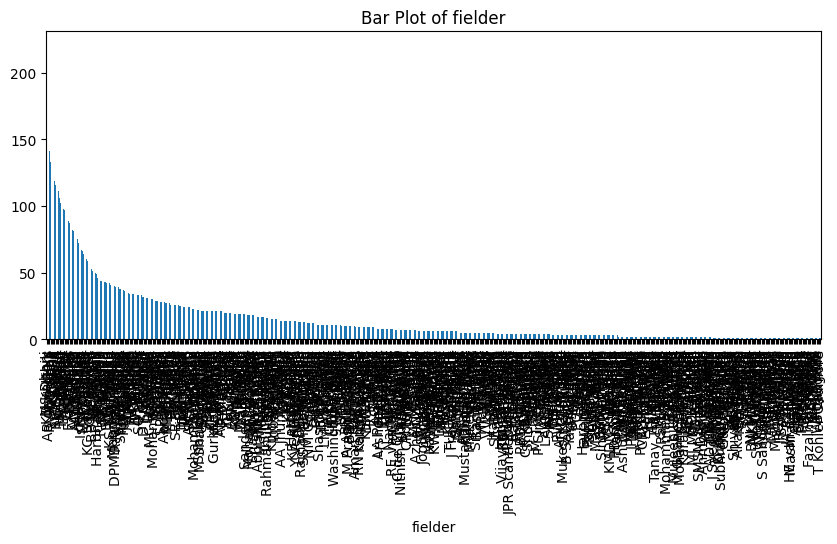

In [124]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

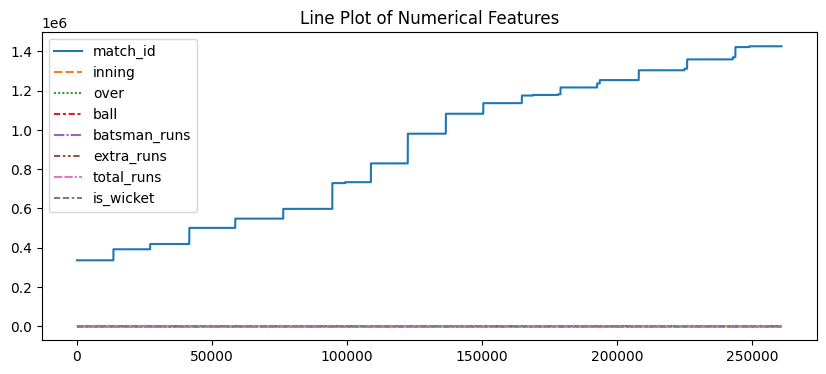

In [125]:
if len(numerical_columns) > 1:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df[numerical_columns])
    plt.title('Line Plot of Numerical Features')
    plt.show()

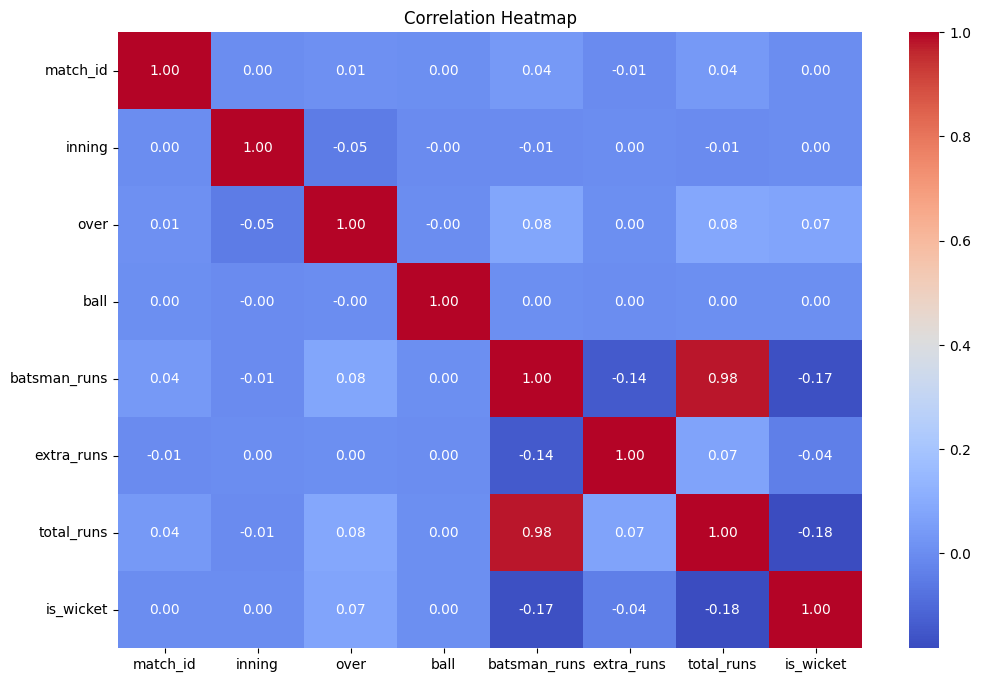

In [126]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

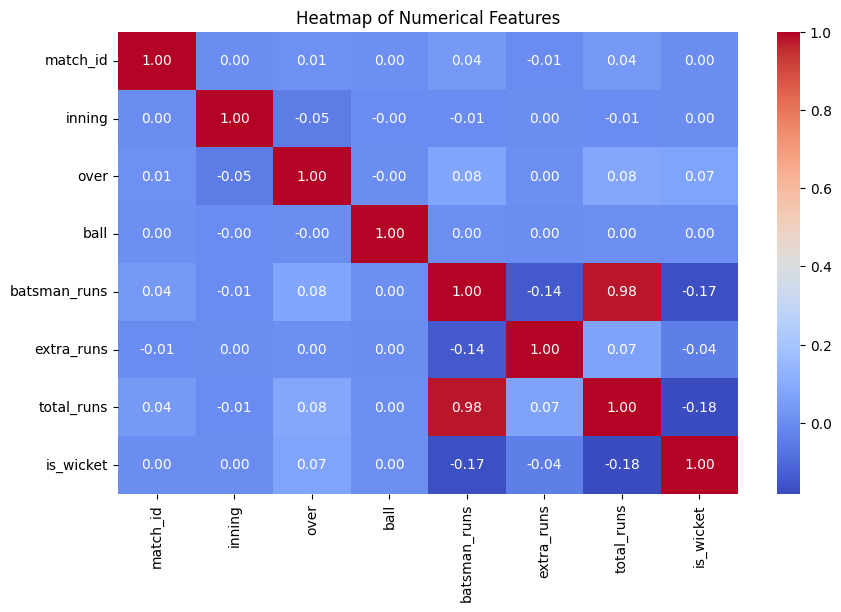

In [127]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features')
plt.show()

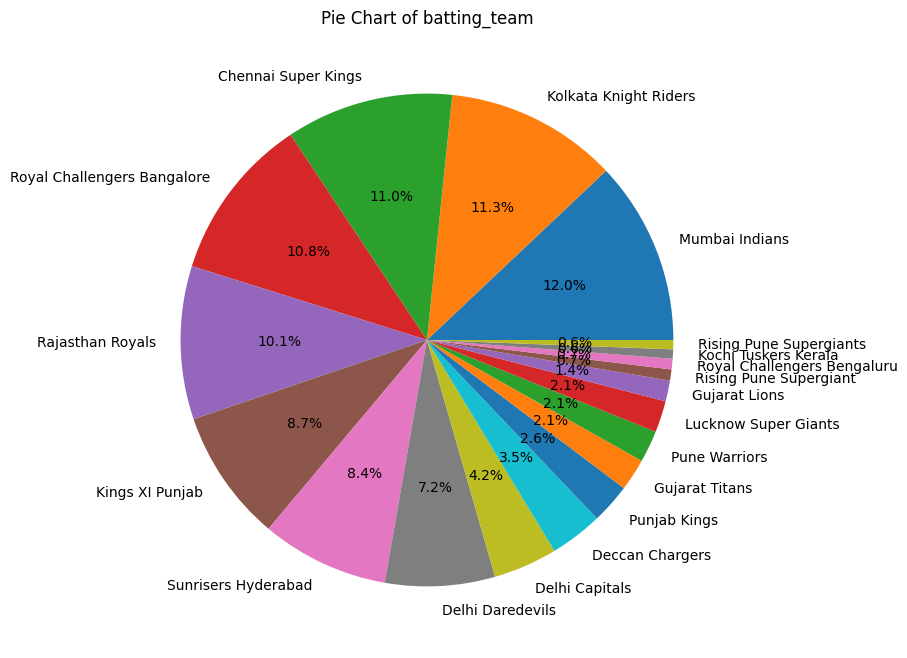

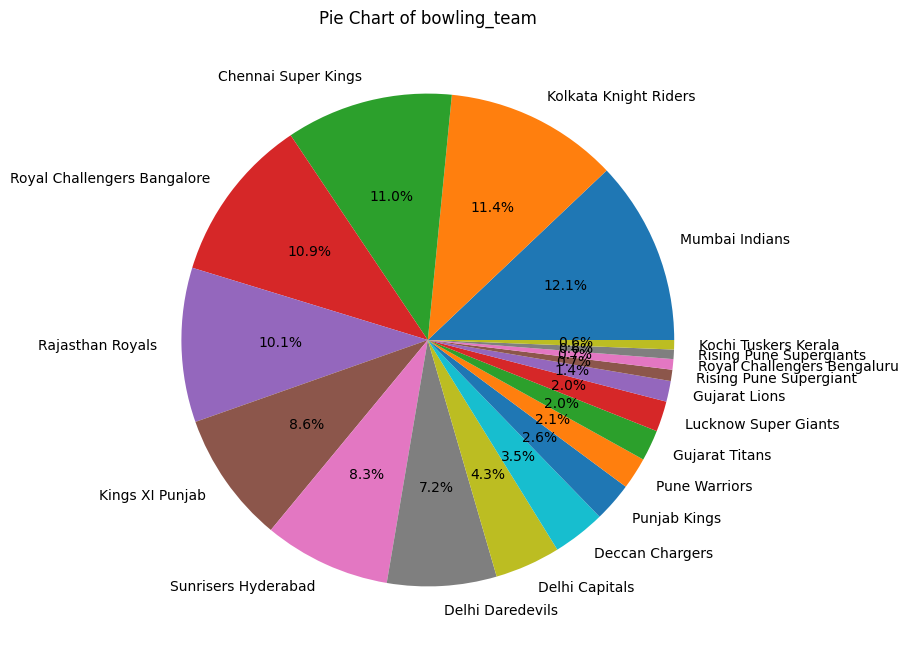

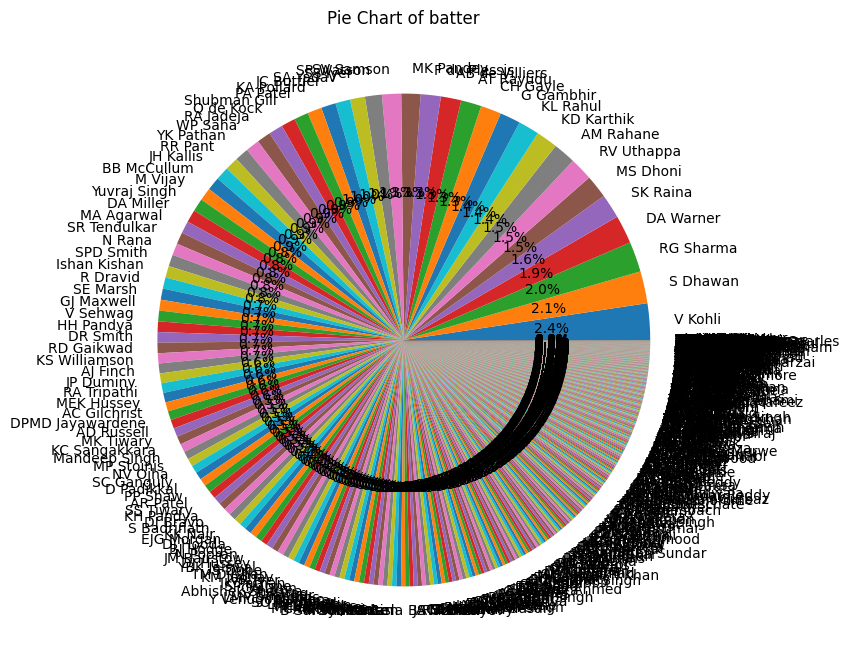

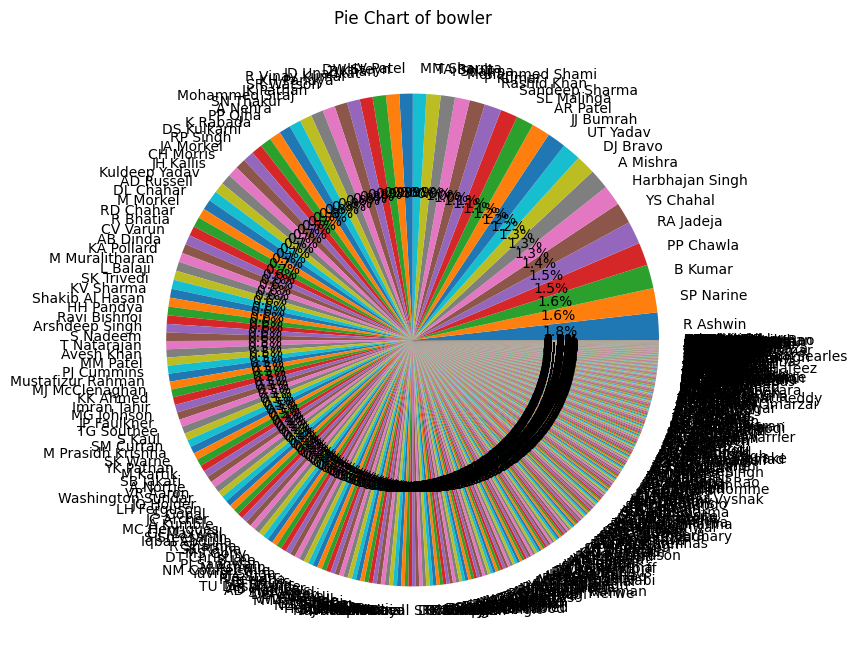

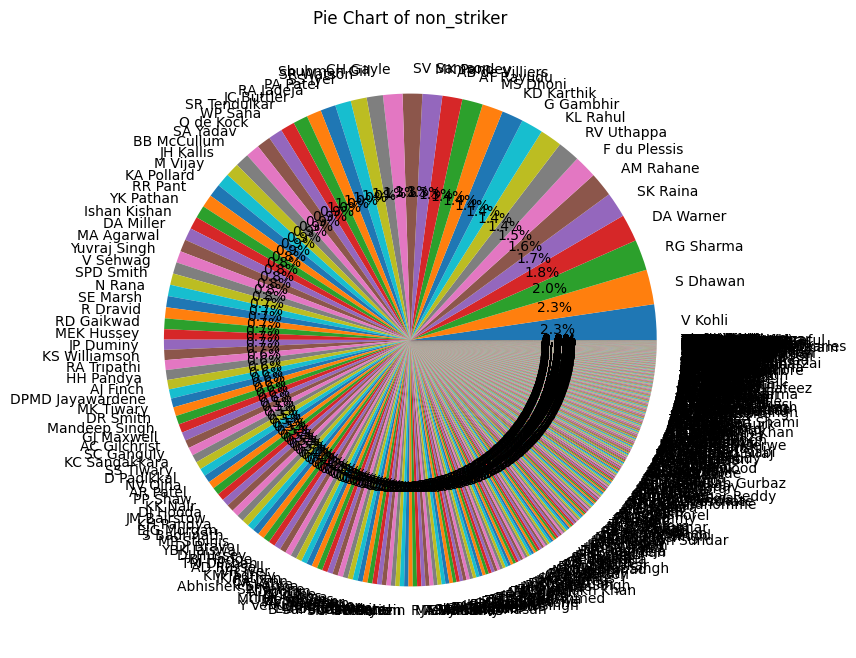

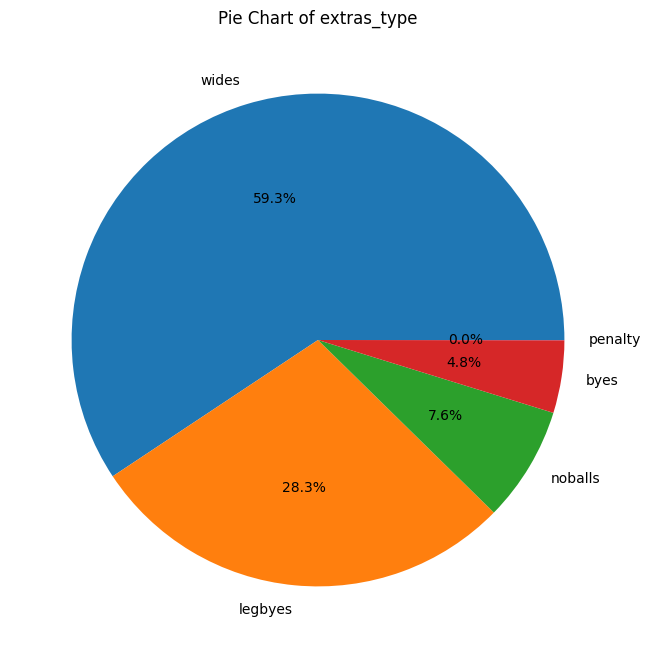

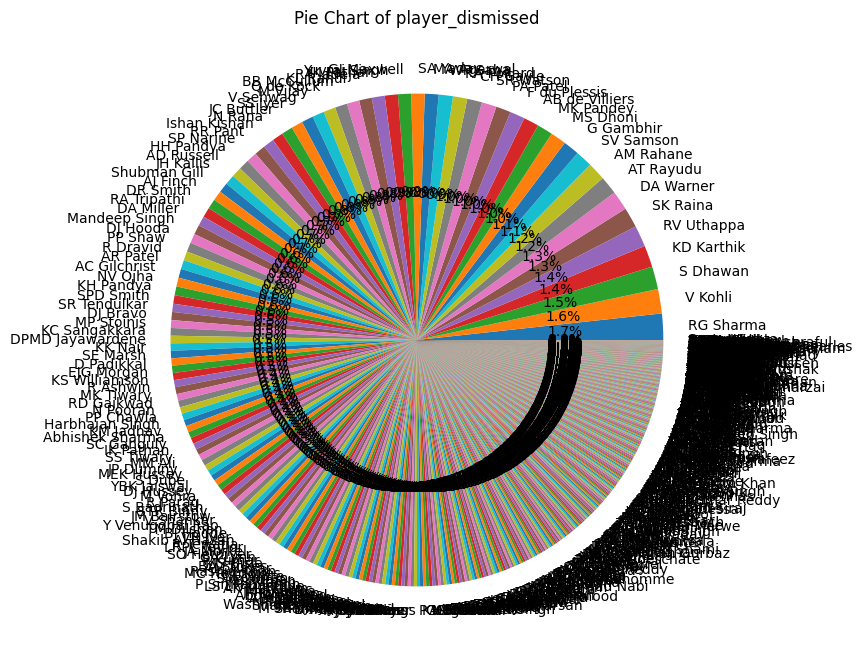

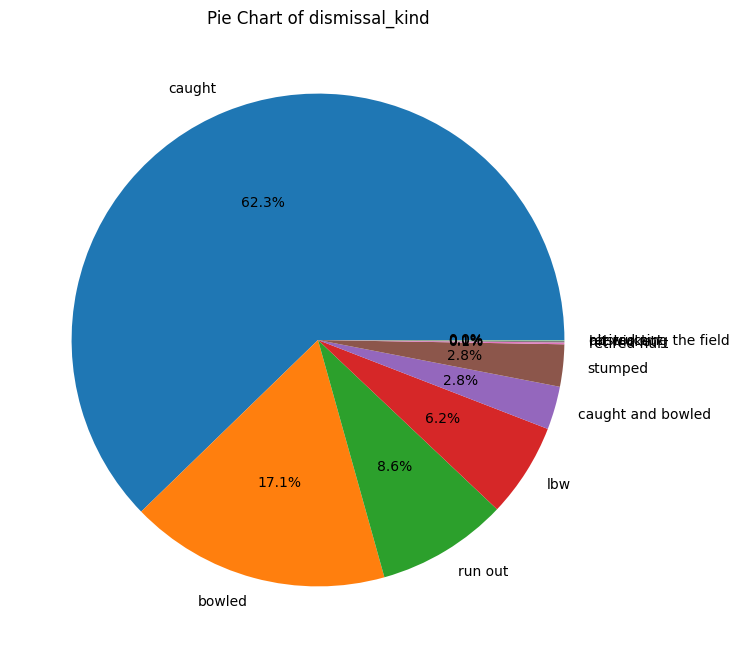

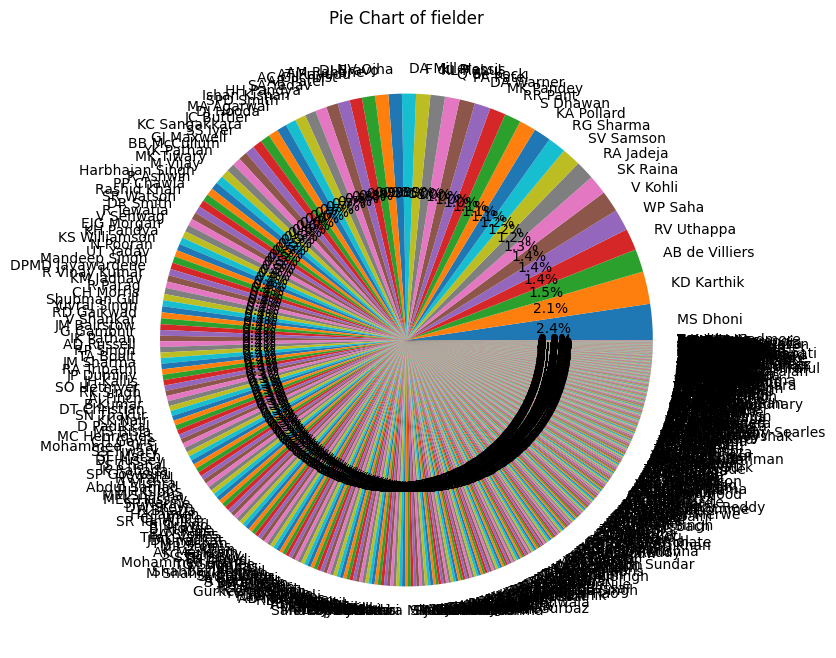

In [128]:
for col in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

# Checking all null values and treating those null values.

In [129]:
null_values = df.isnull().sum().sort_values(ascending=False)

In [130]:
null_values

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
batsman_runs             0
is_wicket                0
total_runs               0
extra_runs               0
match_id                 0
inning                   0
bowler                   0
batter                   0
ball                     0
over                     0
bowling_team             0
batting_team             0
non_striker              0
dtype: int64

In [131]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [132]:
missing_data_with_percentage = pd.concat([null_values, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [133]:
missing_data_with_percentage

Total    Percent
fielder           251566  96.414993
dismissal_kind    247970  95.036793
player_dismissed  247970  95.036793
extras_type       246795  94.586463
batsman_runs           0   0.000000
is_wicket              0   0.000000
total_runs             0   0.000000
extra_runs             0   0.000000
match_id               0   0.000000
inning                 0   0.000000
bowler                 0   0.000000
batter                 0   0.000000
ball                   0   0.000000
over                   0   0.000000
bowling_team           0   0.000000
batting_team           0   0.000000
non_striker            0   0.000000

In [134]:
df.fillna(0, inplace=True)

In [135]:
df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [136]:
df

match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

        over  ball       batter         bowler  non_striker  batsman_runs  \
0          0     1   SC Ganguly        P Kumar  BB McCullum             0   
1          0     2  BB McCullum        P Kumar   SC Ganguly             0   
2          0     3  BB McCullum        P Kumar   SC Ganguly             0   
3          0     4  BB McCullum        P Kumar   SC Ganguly             0   
4          0     5  BB McCullum        P Kumar   SC Ganguly             0   
...      ...   ...          ...            ...          ...           ...   
260915     9     5      SS Iyer     AK Markram      VR Iyer             1   
260916     9     6      VR Iyer     AK Markram      SS Iyer             1   
260917    10     1      VR Iyer  Shahbaz Ahmed      SS Iyer             1   
260918    10     2      SS Iyer  Shahbaz Ahmed      VR Iyer             1   
260919    10     3      VR Iyer  Shahbaz Ahmed      SS Iyer             1   

        extra_runs  total_runs extras_type  is_wicket player_dismissed  \
0                1           1     legbyes          0                0   
1                0           0           0          0                0   
2                1           1       wides          0                0   
3                0           0           0          0                0   
4                0           0           0          0                0   
...            ...         ...         ...        ...              ...   
260915           0           1           0          0                0   
260916           0           1           0          0                0   
260917           0           1           0          0                0   
260918           0           1           0          0                0   
260919           0           1           0          0                0   

       dismissal_kind fielder  
0                   0       0  
1                   0       0  
2                   0       0  
3                   0       0  
4                   0       0  
...               ...     ...  
260915              0       0  
260916              0       0  
260917              0       0  
260918              0       0  
260919              0       0  

[260920 rows x 17 columns]

# Data Analysis

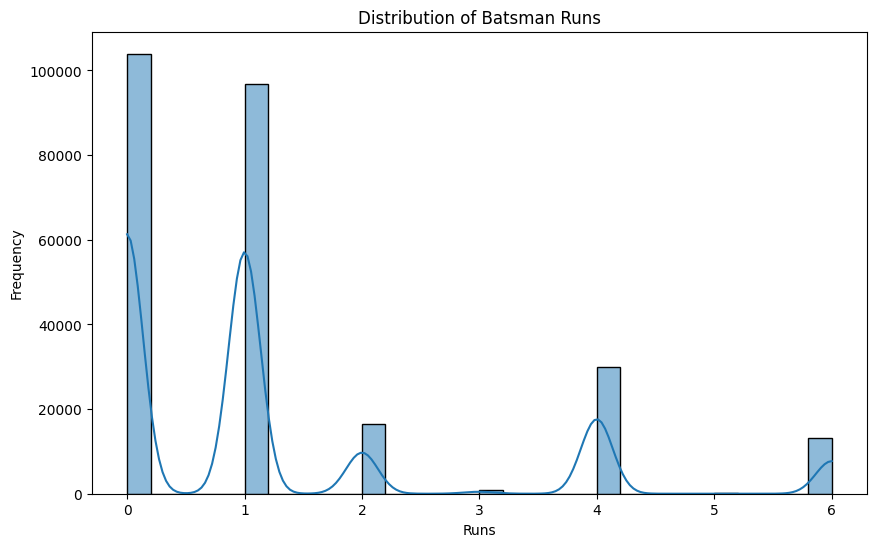

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(df['batsman_runs'], bins=30, kde=True)
plt.title('Distribution of Batsman Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

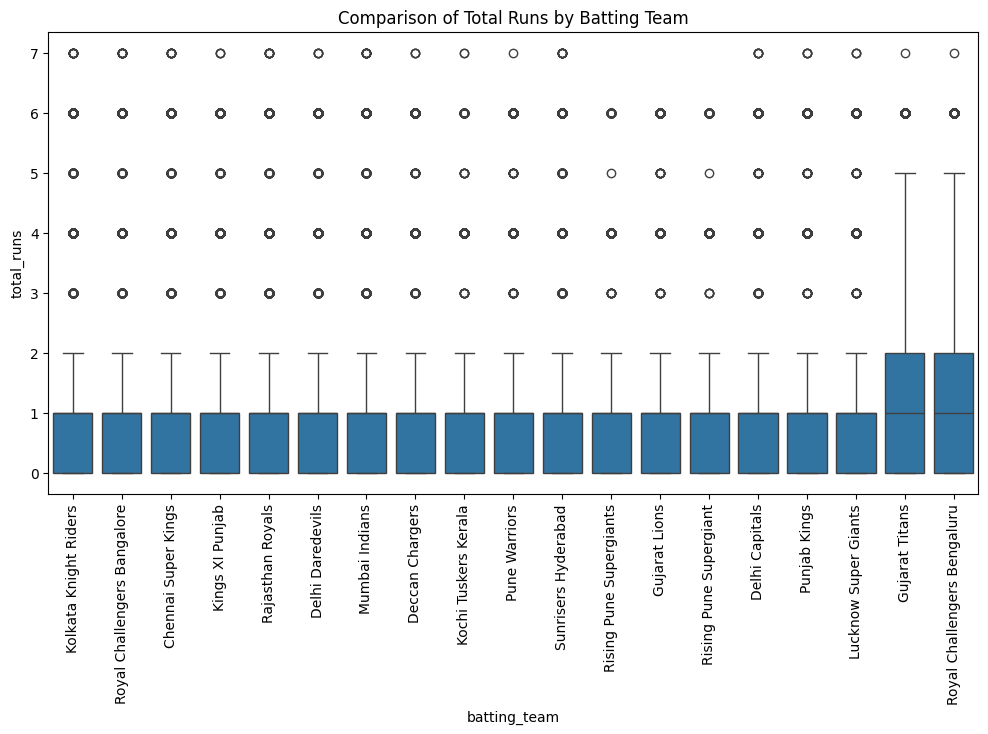

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='batting_team', y='total_runs', data=df)
plt.title('Comparison of Total Runs by Batting Team')
plt.xticks(rotation=90)
plt.show()

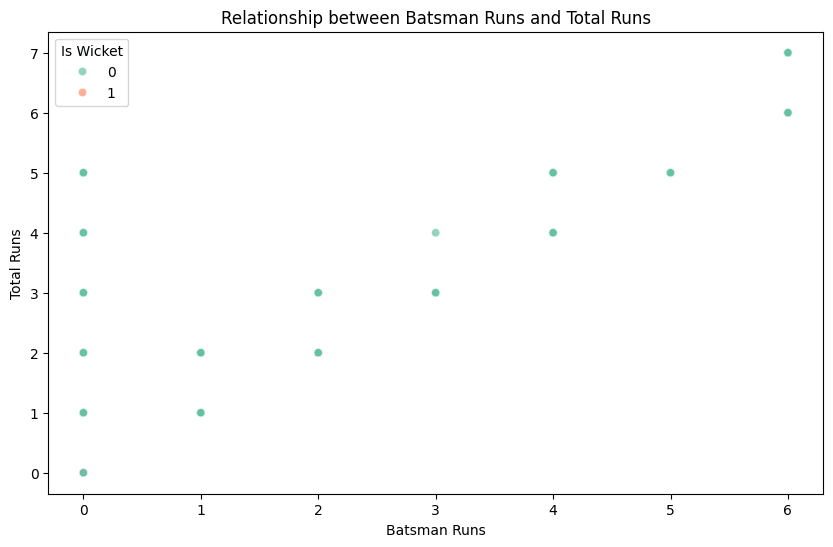

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='batsman_runs', y='total_runs', data=df, hue='is_wicket', palette='Set2', alpha=0.7)
plt.title('Relationship between Batsman Runs and Total Runs')
plt.xlabel('Batsman Runs')
plt.ylabel('Total Runs')
plt.legend(title='Is Wicket', loc='upper left')
plt.show()

# Model Prediction

In [140]:
categorical_features = ['batting_team', 'bowling_team', 'batter', 'bowler', 'fielder']
df[categorical_features] = df[categorical_features].astype(str)

In [141]:
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

In [142]:
X_runs = df[['inning', 'over', 'ball', 'batsman_runs', 'extra_runs']]
Y_runs = df['total_runs']

In [143]:
X_runs

inning  over  ball  batsman_runs  extra_runs
0            1     0     1             0           1
1            1     0     2             0           0
2            1     0     3             0           1
3            1     0     4             0           0
4            1     0     5             0           0
...        ...   ...   ...           ...         ...
260915       2     9     5             1           0
260916       2     9     6             1           0
260917       2    10     1             1           0
260918       2    10     2             1           0
260919       2    10     3             1           0

[260920 rows x 5 columns]

In [144]:
Y_runs

0         1
1         0
2         1
3         0
4         0
         ..
260915    1
260916    1
260917    1
260918    1
260919    1
Name: total_runs, Length: 260920, dtype: int64

In [145]:
X_runs_train, X_runs_test, y_runs_train, y_runs_test = train_test_split(X_runs, Y_runs, test_size=0.2, random_state=42)

### 1. Predict Total Runs

In [146]:
runs_model = LinearRegression()
runs_model.fit(X_runs_train, y_runs_train)

LinearRegression()

In [147]:
y_runs_pred = runs_model.predict(X_runs_test)

In [148]:
mse_runs = mean_squared_error(y_runs_test, y_runs_pred)
r2_runs = r2_score(y_runs_test, y_runs_pred)
print("\nTotal Runs Prediction Performance:")
print(f'Mean Squared Error (MSE): {mse_runs:.2f}')
print(f'R^2 Score: {r2_runs:.2f}')


Total Runs Prediction Performance:
Mean Squared Error (MSE): 0.00
R^2 Score: 1.00


In [149]:
Total_runs_in_one_ball = model.predict([[1, 10, 4, 6, 5]])  
total_pred = int(round(Total_runs_in_one_ball[0])) 
print(f"\nTotal Runs in One Ball: {total_pred} runs")


Total Runs in One Ball: 11 runs


C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 2. Predict Wickets

In [150]:
df['is_wicket'] = df['is_wicket'].fillna(0) 
X_wickets = df[['inning', 'over', 'ball', 'batting_team', 'bowling_team', 'batter', 'bowler']]
Y_wickets = df['is_wicket']

In [151]:
X_wickets_train, X_wickets_test, y_wickets_train, y_wickets_test = train_test_split(X_wickets, Y_wickets, test_size=0.2, random_state=42)

In [152]:
wickets_model = RandomForestClassifier(random_state=42)
wickets_model.fit(X_wickets_train, y_wickets_train)

RandomForestClassifier(random_state=42)

In [153]:
y_wickets_pred = wickets_model.predict(X_wickets_test)

In [154]:
accuracy_wickets = accuracy_score(y_wickets_test, y_wickets_pred)
print("\nWickets Prediction Performance:")
print(f'Accuracy: {accuracy_wickets:.2f}')
print(f'Classification Report:\n{classification_report(y_wickets_test, y_wickets_pred)}')


Wickets Prediction Performance:
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     49632
           1       0.07      0.00      0.01      2552

    accuracy                           0.95     52184
   macro avg       0.51      0.50      0.49     52184
weighted avg       0.91      0.95      0.93     52184



In [182]:
example_pred_wickets = wickets_model.predict([[1, 10, 4, label_encoders['batting_team'].transform(['Kolkata Knight Riders'])[0], 
                                                label_encoders['bowling_team'].transform(['Royal Challengers Bangalore'])[0], 
                                                label_encoders['batter'].transform(['BB McCullum'])[0], 
                                                label_encoders['bowler'].transform(['JH Kallis'])[0]]])

print(f"\nExample Wickets Prediction: {example_pred_wickets[0]}")


Example Wickets Prediction: 0


C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 3. Predict Player Dismissal Type

In [155]:
df['dismissal_kind'] = df['dismissal_kind'].astype(str)
le_dismissal = LabelEncoder()
df['dismissal_kind'] = le_dismissal.fit_transform(df['dismissal_kind'])

In [156]:
X_dismissal = df[['batter', 'bowler', 'fielder', 'inning', 'over', 'ball', 'batting_team', 'bowling_team']]
Y_dismissal = df['dismissal_kind']

In [157]:
X_dismissal_train, X_dismissal_test, y_dismissal_train, y_dismissal_test = train_test_split(X_dismissal, Y_dismissal, test_size=0.2, random_state=42)

In [158]:
dismissal_model = RandomForestClassifier(random_state=42)
dismissal_model.fit(X_dismissal_train, y_dismissal_train)

RandomForestClassifier(random_state=42)

In [159]:
y_dismissal_pred = dismissal_model.predict(X_dismissal_test)

In [160]:
accuracy_dismissal = accuracy_score(y_dismissal_test, y_dismissal_pred)
print("\nDismissal Type Prediction Performance:")
print(f'Accuracy: {accuracy_dismissal:.2f}')
print(f'Classification Report:\n{classification_report(y_dismissal_test, y_dismissal_pred)}')


Dismissal Type Prediction Performance:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     49632
           1       0.07      0.00      0.00       436
           2       0.87      0.99      0.93      1615
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       172
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.43      0.04      0.08       205
          10       1.00      0.02      0.03        64

    accuracy                           0.98     52184
   macro avg       0.34      0.21      0.20     52184
weighted avg       0.97      0.98      0.97     52184



C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [183]:
example_pred_dismissal = dismissal_model.predict([[
    label_encoders['batter'].transform(['BB McCullum'])[0],
    label_encoders['bowler'].transform(['JH Kallis'])[0],
    label_encoders['fielder'].transform(['V Kohli'])[0],
    1,   # inning
    10,  # over
    4,   # ball
    label_encoders['batting_team'].transform(['Kolkata Knight Riders'])[0],
    label_encoders['bowling_team'].transform(['Royal Challengers Bangalore'])[0]
]])

predicted_dismissal_kind = le_dismissal.inverse_transform(example_pred_dismissal)[0]

print(f"\nExample Dismissal Type Prediction: {predicted_dismissal_kind}")



Example Dismissal Type Prediction: caught


C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 4. Predict Match Outcome

In [161]:
mean_total_runs = df['total_runs'].mean()

In [162]:
df['match_result'] = df.apply(lambda x: 1 if x['total_runs'] > mean_total_runs else 0, axis=1)
X_match = df[['total_runs', 'over', 'ball', 'batsman_runs', 'extra_runs']]
Y_match = df['match_result']

In [163]:
X_match_train, X_match_test, y_match_train, y_match_test = train_test_split(X_match, Y_match, test_size=0.2, random_state=42)

In [164]:
match_model = RandomForestClassifier(random_state=42)
match_model.fit(X_match_train, y_match_train)

RandomForestClassifier(random_state=42)

In [165]:
y_match_pred = match_model.predict(X_match_test)

In [166]:
accuracy_match = accuracy_score(y_match_test, y_match_pred)
print("\nMatch Outcome Prediction Performance:")
print(f'Accuracy: {accuracy_match:.2f}')
print(f'Classification Report:\n{classification_report(y_match_test, y_match_pred)}')


Match Outcome Prediction Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39769
           1       1.00      1.00      1.00     12415

    accuracy                           1.00     52184
   macro avg       1.00      1.00      1.00     52184
weighted avg       1.00      1.00      1.00     52184



In [184]:
example_pred_match = match_model.predict([[
    160,  # total_runs
    15,   # over
    4,    # ball
    120,  # batsman_runs
    10    # extra_runs
]])

predicted_match_result = "Win" if example_pred_match[0] == 1 else "Loss"

print(f"\nExample Match Outcome Prediction: {predicted_match_result}")



Example Match Outcome Prediction: Win


C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 5. Additional Analysis: Anomaly Detection Example

In [167]:
anomalies = df[df['total_runs'] > df['total_runs'].mean() + 2 * df['total_runs'].std()]  

In [168]:
print("\nAnomalies in Total Runs:")
print(anomalies[['match_id', 'inning', 'over', 'ball', 'batter', 'total_runs']])


Anomalies in Total Runs:
        match_id  inning  over  ball  batter  total_runs
10        335982       1     1     4     102           6
19        335982       1     3     1     102           5
20        335982       1     3     2     102           6
25        335982       1     3     7     102           6
60        335982       1     9     5     102           6
...          ...     ...   ...   ...     ...         ...
260868   1426312       2     2     2     639           6
260869   1426312       2     2     3     639           6
260889   1426312       2     5     3     639           6
260895   1426312       2     6     3     502           6
260908   1426312       2     8     4     502           6

[13576 rows x 6 columns]


### 6. Player Performance Prediction

In [170]:
encoded_batter = label_encoders['batter'].transform([specific_batter])[0]

In [171]:
if encoded_batter not in df['batter'].values:
    raise ValueError(f"Encoded value for batter '{specific_batter}' not found in the dataset")

In [172]:
X_player = df[df['batter'] == encoded_batter][['inning', 'over', 'ball', 'batting_team', 'bowling_team']]
Y_player = df[df['batter'] == encoded_batter]['batsman_runs']

In [173]:
X_player_train, X_player_test, y_player_train, y_player_test = train_test_split(X_player, Y_player, test_size=0.2, random_state=42)

In [174]:
player_model = LinearRegression()
player_model.fit(X_player_train, y_player_train)

LinearRegression()

In [175]:
y_player_pred = player_model.predict(X_player_test)

In [176]:
mse_player = mean_squared_error(y_player_test, y_player_pred)
r2_player = r2_score(y_player_test, y_player_pred)
print("\nPlayer Performance Prediction (Runs Scored) Performance:")
print(f'Mean Squared Error (MSE): {mse_player:.2f}')
print(f'R^2 Score: {r2_player:.2f}')


Player Performance Prediction (Runs Scored) Performance:
Mean Squared Error (MSE): 2.87
R^2 Score: -0.01


In [181]:
example_pred_player = player_model.predict([[1, 10, 4, label_encoders['batting_team'].transform(['Kolkata Knight Riders'])[0], label_encoders['bowling_team'].transform(['Royal Challengers Bangalore'])[0]]])

rounded_pred_player = int(round(example_pred_player[0]))

print(f"\nPlayer Performance Prediction: {rounded_pred_player} runs")


Player Performance Prediction: 2 runs


C:\Users\rajvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
